In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [4]:
test

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39058,ID97651,0.047982,0.15,0.740385,C2,27003,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
39059,ID97652,1.224838,0.05,0.509615,C8,8794,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3
39060,ID97653,0.520287,0.12,0.355769,C6,13051,1,B2,M7,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0
39061,ID97654,1.172391,0.08,0.644231,C5,34738,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2


In [5]:
test = test.drop('policy_id',1)

C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_2864\705014568.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test = test.drop('policy_id',1)


In [6]:
train = train.drop('policy_id', 1)

C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_2864\2940893060.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train = train.drop('policy_id', 1)


In [7]:
train

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [8]:
train['max_torque'] = train['max_torque'].apply(lambda x: x.split('@')[1][:-3])
train['max_power'] = train['max_power'].apply(lambda x: x.split('@')[1][:-3])
test['max_torque'] = test['max_torque'].apply(lambda x: x.split('@')[1][:-3])
test['max_power'] = test['max_power'].apply(lambda x: x.split('@')[1][:-3])

In [9]:
train['max_torque'] = pd.to_numeric(train['max_torque'])
train['max_power'] = pd.to_numeric(train['max_power'])
test['max_torque'] = pd.to_numeric(test['max_torque'])
test['max_power'] = pd.to_numeric(test['max_power'])

In [10]:
train_object = train.select_dtypes('object').columns

In [11]:
enco = LabelEncoder()

for i in train.select_dtypes('object'):
    train[i] = enco.fit_transform(train[i])

for i in test.select_dtypes('object'):
    test[i] = enco.fit_transform(test[i])

In [12]:
test

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.341732,0.00,0.586538,15,4076,1,0,0,0,3500,...,0,0,0,0,1,0,0,0,1,0
1,0.307241,0.13,0.442308,20,8794,1,2,7,2,4400,...,0,1,1,1,1,1,1,1,1,2
2,0.327924,0.12,0.451923,20,8794,2,0,4,2,4250,...,0,0,1,1,1,0,1,1,1,2
3,0.782654,0.01,0.461538,17,34738,1,0,0,0,3500,...,0,0,0,0,1,0,0,0,1,0
4,1.233404,0.02,0.634615,17,34738,1,0,0,0,3500,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39058,0.047982,0.15,0.740385,11,27003,1,2,7,2,4400,...,0,1,1,1,1,1,1,1,1,2
39059,1.224838,0.05,0.509615,20,8794,3,4,5,1,2750,...,1,1,1,1,1,1,0,1,1,3
39060,0.520287,0.12,0.355769,18,13051,1,2,8,2,4400,...,1,1,1,1,1,1,1,1,1,0
39061,1.172391,0.08,0.644231,17,34738,1,3,3,2,4400,...,1,1,1,1,1,1,1,1,1,2


In [13]:
train

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,0,4990,1,0,0,0,3500,...,0,0,0,1,0,0,0,1,0,0
1,0.672619,0.02,0.375000,11,27003,1,0,0,0,3500,...,0,0,0,1,0,0,0,1,0,0
2,0.841110,0.02,0.384615,15,4076,1,0,0,0,3500,...,0,0,0,1,0,0,0,1,0,0
3,0.900277,0.11,0.432692,16,21622,1,3,3,2,4400,...,1,1,1,1,1,1,1,1,2,0
4,0.596403,0.11,0.634615,17,34738,2,0,4,2,4250,...,0,1,1,1,0,1,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,20,8794,2,0,4,2,4250,...,0,1,1,1,0,1,1,1,2,0
58588,1.199642,0.02,0.519231,5,7788,1,0,0,0,3500,...,0,0,0,1,0,0,0,1,0,0
58589,1.162273,0.05,0.451923,17,34738,1,0,0,0,3500,...,0,0,0,1,0,0,0,1,0,0
58590,1.236307,0.14,0.557692,20,8794,1,2,7,2,4400,...,1,1,1,1,1,1,1,1,2,0


In [14]:
sum(train['is_claim'] == 0)

54844

In [15]:
train_1 = train[train['is_claim']==1]

In [16]:
train1 = train[train['is_claim']==0].sample(3748)

In [17]:
train1.shape

(3748, 43)

In [18]:
test.shape

(39063, 42)

In [19]:
train1 = pd.concat([train1, train_1])

In [20]:
y = train1['is_claim']

In [21]:
X = train1.drop('is_claim',1)

C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_2864\8942821.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = train1.drop('is_claim',1)


In [22]:
X

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
51020,0.529622,0.08,0.451923,1,73430,2,0,4,2,4250,...,0,0,1,1,1,0,1,1,1,2
58431,0.071161,0.15,0.365385,20,8794,3,4,5,1,2750,...,1,1,1,1,1,1,0,1,1,3
6537,0.182659,0.03,0.355769,20,8794,1,2,7,2,4400,...,0,1,1,1,1,1,1,1,1,2
16880,1.035823,0.04,0.538462,11,27003,3,4,5,1,2750,...,1,1,1,1,1,1,0,1,1,3
36312,1.051952,0.05,0.442308,15,4076,1,0,0,0,3500,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58559,0.484333,0.12,0.596154,20,8794,1,2,8,2,4400,...,1,1,1,1,1,1,1,1,1,0
58567,1.148102,0.04,0.451923,3,34791,3,4,5,1,2750,...,1,1,1,1,1,1,0,1,1,3
58573,0.151652,0.00,0.365385,0,4990,1,0,0,0,3500,...,0,0,0,0,1,0,0,0,1,0
58574,0.278499,0.07,0.557692,4,5410,3,4,5,1,2750,...,1,1,1,1,1,1,0,1,1,3


In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7496 entries, 51020 to 58581
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     7496 non-null   float64
 1   age_of_car                        7496 non-null   float64
 2   age_of_policyholder               7496 non-null   float64
 3   area_cluster                      7496 non-null   int32  
 4   population_density                7496 non-null   int64  
 5   make                              7496 non-null   int64  
 6   segment                           7496 non-null   int32  
 7   model                             7496 non-null   int32  
 8   fuel_type                         7496 non-null   int32  
 9   max_torque                        7496 non-null   int64  
 10  max_power                         7496 non-null   int64  
 11  engine_type                       7496 non-null   int32  
 12  a

<AxesSubplot:>

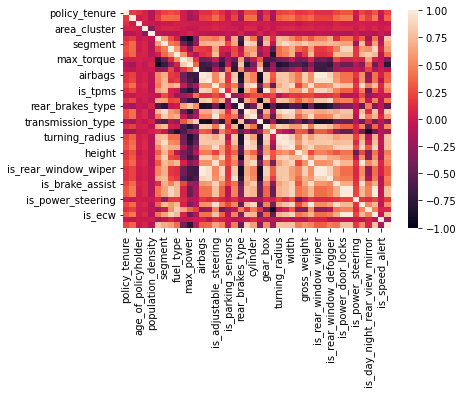

In [24]:
sns.heatmap(X.corr())

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 45)

In [26]:
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
predicted= model.predict(X_test) 

In [28]:
predicted

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [29]:
f1_score(y_test, predicted)

0.5096217650962176

In [30]:
samp_pred = model.predict(test)

In [31]:
samp_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [32]:
test1 = pd.read_csv('test.csv')
ID = test1['policy_id']

In [33]:
data = {'policy_id':ID, 'is_claim' : samp_pred}
df = pd.DataFrame(data)
df.to_csv('samp_pred.csv', index = False)

In [34]:
n = []
score =[]
for i in range(1,100):
    n.append(i)
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    predicted= model.predict(X_test)
    score1 = f1_score(y_test, predicted)
    score.append(score1)
    

    
    

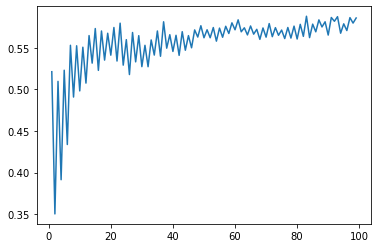

In [35]:
plt.plot(n,score)

In [36]:
score_df = pd.DataFrame({'n':n, 'score':score})

In [37]:
score_df[score_df['score'] == score_df['score'].max()]

,n,score
82,83,0.587863


In [38]:
model_49 = KNeighborsClassifier(n_neighbors=49)

model_49.fit(X_train,y_train)

predicted= model_49.predict(X_test) 

f1_score(y_test, predicted)

0.5764631843926998

In [39]:
model49_pred = model_49.predict(test)

In [40]:
data = {'policy_id':ID, 'is_claim' : model49_pred}
df = pd.DataFrame(data)
df.to_csv('model49_pred.csv', index = False)

In [41]:
xmodel = xgb.XGBClassifier()
xmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [42]:
xpred = xmodel.predict(X_test)

In [43]:
f1_score(y_test, xpred)

0.5938521909744932

In [44]:
xmodel_pred = xmodel.predict(test)

In [45]:
data = {'policy_id':ID, 'is_claim' : xmodel_pred}
df = pd.DataFrame(data)
df.to_csv('xmodel_pred.csv', index = False)

In [46]:
# CV search
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [47]:
xgb1 = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', nthread=1)


In [49]:
model_83 = KNeighborsClassifier(n_neighbors=83)

model_83.fit(X_train,y_train)

predicted= model_83.predict(X_test) 

f1_score(y_test, predicted)

0.5878634639696586

In [51]:
model83_pred = model_83.predict(test)

data = {'policy_id':ID, 'is_claim' : model83_pred}
df = pd.DataFrame(data)
df.to_csv('model83_pred.csv', index = False)